In [17]:
import pycaret.classification as clf
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
import matplotlib.pyplot as plt


rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False  

In [2]:
import pandas as pd
import numpy as np

In [5]:
new_df = clf.setup(data=plus_features_q3,
                   target='label',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True,)

,Description,Value
0,session_id,6817
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(18866, 134)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,114
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
plus_features_q3 = pd.read_csv('plus_features_q3.csv', index_col = 0)
plus_features_q3

,횟수별_1분기 중요 카테고리 top_1_가구인테리어/잡화_고가,횟수별_1분기 중요 카테고리 top_1_가구인테리어/잡화_저가,횟수별_1분기 중요 카테고리 top_1_가구인테리어/잡화_중가,횟수별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,횟수별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,횟수별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,횟수별_1분기 중요 카테고리 top_1_교육문화/아동_고가,횟수별_1분기 중요 카테고리 top_1_교육문화/아동_중가,횟수별_1분기 중요 카테고리 top_1_식품/생활_고가,횟수별_1분기 중요 카테고리 top_1_식품/생활_저가,횟수별_1분기 중요 카테고리 top_1_식품/생활_중가,횟수별_1분기 중요 카테고리 top_1_의류/이미용_고가,횟수별_1분기 중요 카테고리 top_1_의류/이미용_저가,횟수별_1분기 중요 카테고리 top_1_의류/이미용_중가,횟수별_1분기 중요 카테고리 top_1_침구/주방_고가,횟수별_1분기 중요 카테고리 top_1_침구/주방_저가,횟수별_1분기 중요 카테고리 top_1_침구/주방_중가,금액별_1분기 중요 카테고리 top_1_가구인테리어/잡화_고가,금액별_1분기 중요 카테고리 top_1_가구인테리어/잡화_저가,금액별_1분기 중요 카테고리 top_1_가구인테리어/잡화_중가,금액별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,금액별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,금액별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,금액별_1분기 중요 카테고리 top_1_교육문화/아동_고가,금액별_1분기 중요 카테고리 top_1_교육문화/아동_저가,금액별_1분기 중요 카테고리 top_1_교육문화/아동_중가,금액별_1분기 중요 카테고리 top_1_식품/생활_고가,금액별_1분기 중요 카테고리 top_1_식품/생활_저가,금액별_1분기 중요 카테고리 top_1_식품/생활_중가,금액별_1분기 중요 카테고리 top_1_의류/이미용_고가,금액별_1분기 중요 카테고리 top_1_의류/이미용_저가,금액별_1분기 중요 카테고리 top_1_의류/이미용_중가,금액별_1분기 중요 카테고리 top_1_침구/주방_고가,금액별_1분기 중요 카테고리 top_1_침구/주방_저가,금액별_1분기 중요 카테고리 top_1_침구/주방_중가,횟수별_2분기 중요 카테고리 top_1_가구인테리어/잡화_고가,횟수별_2분기 중요 카테고리 top_1_가구인테리어/잡화_저가,횟수별_2분기 중요 카테고리 top_1_가구인테리어/잡화_중가,횟수별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,횟수별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,횟수별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,횟수별_2분기 중요 카테고리 top_1_교육문화/아동_고가,횟수별_2분기 중요 카테고리 top_1_교육문화/아동_저가,횟수별_2분기 중요 카테고리 top_1_교육문화/아동_중가,횟수별_2분기 중요 카테고리 top_1_식품/생활_고가,횟수별_2분기 중요 카테고리 top_1_식품/생활_저가,횟수별_2분기 중요 카테고리 top_1_식품/생활_중가,횟수별_2분기 중요 카테고리 top_1_의류/이미용_고가,횟수별_2분기 중요 카테고리 top_1_의류/이미용_저가,횟수별_2분기 중요 카테고리 top_1_의류/이미용_중가,횟수별_2분기 중요 카테고리 top_1_침구/주방_고가,횟수별_2분기 중요 카테고리 top_1_침구/주방_저가,횟수별_2분기 중요 카테고리 top_1_침구/주방_중가,금액별_2분기 중요 카테고리 top_1_가구인테리어/잡화_고가,금액별_2분기 중요 카테고리 top_1_가구인테리어/잡화_저가,금액별_2분기 중요 카테고리 top_1_가구인테리어/잡화_중가,금액별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,금액별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,금액별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,금액별_2분기 중요 카테고리 top_1_교육문화/아동_고가,금액별_2분기 중요 카테고리 top_1_교육문화/아동_저가,금액별_2분기 중요 카테고리 top_1_교육문화/아동_중가,금액별_2분기 중요 카테고리 top_1_식품/생활_고가,금액별_2분기 중요 카테고리 top_1_식품/생활_저가,금액별_2분기 중요 카테고리 top_1_식품/생활_중가,금액별_2분기 중요 카테고리 top_1_의류/이미용_고가,금액별_2분기 중요 카테고리 top_1_의류/이미용_저가,금액별_2분기 중요 카테고리 top_1_의류/이미용_중가,금액별_2분기 중요 카테고리 top_1_침구/주방_고가,금액별_2분기 중요 카테고리 top_1_침구/주방_저가,금액별_2분기 중요 카테고리 top_1_침구/주방_중가,횟수별_3분기 중요 카테고리 top_1_가구인테리어/잡화_고가,횟수별_3분기 중요 카테고리 top_1_가구인테리어/잡화_저가,횟수별_3분기 중요 카테고리 top_1_가구인테리어/잡화_중가,횟수별_3분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,횟수별_3분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,횟수별_3분기 중요 카테고리 top_1_교육문화/아동_고가,횟수별_3분기 중요 카테고리 top_1_교육문화/아동_저가,횟수별_3분기 중요 카테고리 top_1_교육문화/아동_중가,횟수별_3분기 중요 카테고리 top_1_식품/생활_고가,횟수별_3분기 중요 카테고리 top_1_식품/생활_저가,횟수별_3분기 중요 카테고리 top_1_식품/생활_중가,횟수별_3분기 중요 카테고리 top_1_의류/이미용_고가,횟수별_3분기 중요 카테고리 top_1_의류/이미용_저가,횟수별_3분기 중요 카테고리 top_1_의류/이미용_중가,횟수별_3분기 중요 카테고리 top_1_침구/주방_고가,횟수별_3분기 중요 카테고리 top_1_침구/주방_저가,횟수별_3분기 중요 카테고리 top_1_침구/주방_중가,금액별_3분기 중요 카테고리 top_1_가구인테리어/잡화_고가,금액별_3분기 중요 카테고리 top_1_가구인테리어/잡화_저가,금액별_3분기 중요 카테고리 top_1_가구인테리어/잡화_중가,금액별_3분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,금액별_3분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,금액별_3분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,금액별_3분기 중요 카테고리 top_1_교육문화/아동_고가,금액별_3분기 중요 카테고리 top_1_교육문화/아동_저가,금액별_3분기 중요 카테고리 top_1_교육문화/아동_중가,금액별_3분기 중요 카테고리 top_1_식품/생활_고가,금액별_3분기 중요 카테고리 top_1_식품/생활_저가,금액별_3분기 중요 카테고리 top_1_식품/생활_중가,금액별_3분기 중요 카테고리 top_1_의류/이미용_고가,금액별_3분기 중요 카테고리 top_1_의류/이미용_저가,금액별_3분기 중요 카테고리 top_1_의류/이미용_중가,금액별_3분기 중요 카테고리 top_1_침구/주방_고가,금액별_3분기 중요 카테고리 top_1_침구/주방_저가,금액별_3분기 중요 카테고리 top_1_침구/주방_중가,label,사치품_구매횟수 등급,일용품_구매횟수 등급,선매품_구매횟수 등급,사치품_구매액 등급,일용품_구매액 등급,선매품_구매액 등급,전체_구매횟수 등급,전체_구매액 등급,Engel_PURAMT,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_

In [6]:
model = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6262,0.6672,0.4769,0.6337,0.5442,0.2379,0.2448,1.2940
lightgbm,Light Gradient Boosting Machine,0.6252,0.6614,0.5176,0.6191,0.5638,0.2398,0.2427,0.1560
ada,Ada Boost Classifier,0.6244,0.6635,0.4787,0.6305,0.5441,0.2348,0.2413,0.3480
rf,Random Forest Classifier,0.6181,0.6551,0.4988,0.6131,0.5501,0.2244,0.2280,0.5520
xgboost,Extreme Gradient Boosting,0.6112,0.6417,0.5264,0.5958,0.5589,0.2137,0.2150,1.6840
lr,Logistic Regression,0.6094,0.6410,0.4522,0.6119,0.5201,0.2031,0.2097,2.3280
ridge,Ridge Classifier,0.6079,0.0000,0.4460,0.6111,0.5156,0.1995,0.2065,0.0860
lda,Linear Discriminant Analysis,0.6079,0.6389,0.4466,0.6111,0.5160,0.1997,0.2067,0.2200
et,Extra Trees Classifier,0.5954,0.6210,0.4720,0.5837,0.5219,0.1780,0.1810,0.7080
nb,Naive Bayes,0.5618,0.5757,0.2589,0.5760,0.3506,0.0900,0.1081,0.4800


In [7]:
best_model = clf.tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6413,0.6833,0.5039,0.6508,0.5680,0.2697,0.2762
1,0.6244,0.6485,0.4798,0.6295,0.5446,0.2347,0.2410
2,0.6213,0.6524,0.4805,0.6241,0.5430,0.2289,0.2346
3,0.6213,0.6568,0.4710,0.6268,0.5378,0.2278,0.2345
4,0.6186,0.6511,0.4695,0.6225,0.5353,0.2225,0.2289
Mean,0.6254,0.6584,0.4810,0.6307,0.5457,0.2367,0.2430
Std,0.0082,0.0127,0.0123,0.0103,0.0116,0.0169,0.0170


In [8]:
clf.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [11]:
# 모델 저장
clf.save_model(best_model , 'my_best_pipeline')

# 모델 불러오기
# loaded_model = load_model('my_best_pipeline')
# print(loaded_model)

Transformation Pipeline and Model Successfully Saved


NameError: name 'load_model' is not defined

In [ ]:
clf.create_model('')

## Target 바꿔서 돌려보기

단순 증감 여부로 바꾸기 (0: 감소, 1: 증가)

In [12]:
change_features_q3 = pd.read_csv('change_label.csv', index_col = 0)
change_features_q3.head()

,횟수별_1분기 중요 카테고리 top_1_가구인테리어/잡화_고가,횟수별_1분기 중요 카테고리 top_1_가구인테리어/잡화_저가,횟수별_1분기 중요 카테고리 top_1_가구인테리어/잡화_중가,횟수별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,횟수별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,횟수별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,횟수별_1분기 중요 카테고리 top_1_교육문화/아동_고가,횟수별_1분기 중요 카테고리 top_1_교육문화/아동_중가,횟수별_1분기 중요 카테고리 top_1_식품/생활_고가,횟수별_1분기 중요 카테고리 top_1_식품/생활_저가,횟수별_1분기 중요 카테고리 top_1_식품/생활_중가,횟수별_1분기 중요 카테고리 top_1_의류/이미용_고가,횟수별_1분기 중요 카테고리 top_1_의류/이미용_저가,횟수별_1분기 중요 카테고리 top_1_의류/이미용_중가,횟수별_1분기 중요 카테고리 top_1_침구/주방_고가,횟수별_1분기 중요 카테고리 top_1_침구/주방_저가,횟수별_1분기 중요 카테고리 top_1_침구/주방_중가,금액별_1분기 중요 카테고리 top_1_가구인테리어/잡화_고가,금액별_1분기 중요 카테고리 top_1_가구인테리어/잡화_저가,금액별_1분기 중요 카테고리 top_1_가구인테리어/잡화_중가,금액별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,금액별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,금액별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,금액별_1분기 중요 카테고리 top_1_교육문화/아동_고가,금액별_1분기 중요 카테고리 top_1_교육문화/아동_저가,금액별_1분기 중요 카테고리 top_1_교육문화/아동_중가,금액별_1분기 중요 카테고리 top_1_식품/생활_고가,금액별_1분기 중요 카테고리 top_1_식품/생활_저가,금액별_1분기 중요 카테고리 top_1_식품/생활_중가,금액별_1분기 중요 카테고리 top_1_의류/이미용_고가,금액별_1분기 중요 카테고리 top_1_의류/이미용_저가,금액별_1분기 중요 카테고리 top_1_의류/이미용_중가,금액별_1분기 중요 카테고리 top_1_침구/주방_고가,금액별_1분기 중요 카테고리 top_1_침구/주방_저가,금액별_1분기 중요 카테고리 top_1_침구/주방_중가,횟수별_2분기 중요 카테고리 top_1_가구인테리어/잡화_고가,횟수별_2분기 중요 카테고리 top_1_가구인테리어/잡화_저가,횟수별_2분기 중요 카테고리 top_1_가구인테리어/잡화_중가,횟수별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,횟수별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,횟수별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,횟수별_2분기 중요 카테고리 top_1_교육문화/아동_고가,횟수별_2분기 중요 카테고리 top_1_교육문화/아동_저가,횟수별_2분기 중요 카테고리 top_1_교육문화/아동_중가,횟수별_2분기 중요 카테고리 top_1_식품/생활_고가,횟수별_2분기 중요 카테고리 top_1_식품/생활_저가,횟수별_2분기 중요 카테고리 top_1_식품/생활_중가,횟수별_2분기 중요 카테고리 top_1_의류/이미용_고가,횟수별_2분기 중요 카테고리 top_1_의류/이미용_저가,횟수별_2분기 중요 카테고리 top_1_의류/이미용_중가,횟수별_2분기 중요 카테고리 top_1_침구/주방_고가,횟수별_2분기 중요 카테고리 top_1_침구/주방_저가,횟수별_2분기 중요 카테고리 top_1_침구/주방_중가,금액별_2분기 중요 카테고리 top_1_가구인테리어/잡화_고가,금액별_2분기 중요 카테고리 top_1_가구인테리어/잡화_저가,금액별_2분기 중요 카테고리 top_1_가구인테리어/잡화_중가,금액별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,금액별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,금액별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,금액별_2분기 중요 카테고리 top_1_교육문화/아동_고가,...,횟수별_3분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,횟수별_3분기 중요 카테고리 top_1_교육문화/아동_고가,횟수별_3분기 중요 카테고리 top_1_교육문화/아동_저가,횟수별_3분기 중요 카테고리 top_1_교육문화/아동_중가,횟수별_3분기 중요 카테고리 top_1_식품/생활_고가,횟수별_3분기 중요 카테고리 top_1_식품/생활_저가,횟수별_3분기 중요 카테고리 top_1_식품/생활_중가,횟수별_3분기 중요 카테고리 top_1_의류/이미용_고가,횟수별_3분기 중요 카테고리 top_1_의류/이미용_저가,횟수별_3분기 중요 카테고리 top_1_의류/이미용_중가,횟수별_3분기 중요 카테고리 top_1_침구/주방_고가,횟수별_3분기 중요 카테고리 top_1_침구/주방_저가,횟수별_3분기 중요 카테고리 top_1_침구/주방_중가,금액별_3분기 중요 카테고리 top_1_가구인테리어/잡화_고가,금액별_3분기 중요 카테고리 top_1_가구인테리어/잡화_저가,금액별_3분기 중요 카테고리 top_1_가구인테리어/잡화_중가,금액별_3분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,금액별_3분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,금액별_3분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,금액별_3분기 중요 카테고리 top_1_교육문화/아동_고가,금액별_3분기 중요 카테고리 top_1_교육문화/아동_저가,금액별_3분기 중요 카테고리 top_1_교육문화/아동_중가,금액별_3분기 중요 카테고리 top_1_식품/생활_고가,금액별_3분기 중요 카테고리 top_1_식품/생활_저가,금액별_3분기 중요 카테고리 top_1_식품/생활_중가,금액별_3분기 중요 카테고리 top_1_의류/이미용_고가,금액별_3분기 중요 카테고리 top_1_의류/이미용_저가,금액별_3분기 중요 카테고리 top_1_의류/이미용_중가,금액별_3분기 중요 카테고리 top_1_침구/주방_고가,금액별_3분기 중요 카테고리 top_1_침구/주방_저가,금액별_3분기 중요 카테고리 top_1_침구/주방_중가,label,사치품_구매횟수 등급,일용품_구매횟수 등급,선매품_구매횟수 등급,사치품_구매액 등급,일용품_구매액 등급,선매품_구매액 등급,전체_구매횟수 등급,전체_구매액 등급,Engel_PURAMT,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가,purchase_sum_단순증감여부
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,8,1,3,2,1,1,7,14.123424,0.526978,-1.634662,1.017175,-1.940643,0.000000e+00,-7.063463e-02,0.0,0.0,-0.536326,-2.651036,3.388950,2.615883,-0.999963,0.000000,3.348119e+00,3.114404e+00,0.000000e+00,0.323959,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [13]:
change_new_df = clf.setup(data=change_features_q3.drop('label', axis=1),
                   target='purchase_sum_단순증감여부',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True,)

,Description,Value
0,session_id,990
1,Target,purchase_sum_단순증감여부
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(18866, 134)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,114
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
model = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6433,0.6794,0.7650,0.6490,0.7022,0.2650,0.2707,0.1680
gbc,Gradient Boosting Classifier,0.6393,0.6793,0.7884,0.6395,0.7061,0.2523,0.2619,1.4160
ada,Ada Boost Classifier,0.6326,0.6672,0.7723,0.6367,0.6979,0.2400,0.2475,0.3900
rf,Random Forest Classifier,0.6308,0.6667,0.7371,0.6433,0.6870,0.2421,0.2454,0.5700
xgboost,Extreme Gradient Boosting,0.6251,0.6603,0.7256,0.6403,0.6803,0.2314,0.2341,1.5740
lr,Logistic Regression,0.6222,0.6491,0.7875,0.6239,0.6962,0.2143,0.2246,2.4960
ridge,Ridge Classifier,0.6205,0.0000,0.7892,0.6220,0.6957,0.2101,0.2208,0.0640
lda,Linear Discriminant Analysis,0.6202,0.6465,0.7883,0.6219,0.6953,0.2095,0.2201,0.2220
et,Extra Trees Classifier,0.6075,0.6350,0.7324,0.6213,0.6723,0.1913,0.1954,0.6640
nb,Naive Bayes,0.5600,0.5771,0.6898,0.5876,0.6026,0.0946,0.1103,0.4840


In [15]:
best_model = clf.tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6224,0.6675,0.7040,0.6428,0.6720,0.2292,0.2306
1,0.6426,0.6806,0.7179,0.6609,0.6882,0.2712,0.2725
2,0.6335,0.6682,0.7450,0.6441,0.6909,0.2467,0.2507
3,0.6266,0.6632,0.7233,0.6424,0.6805,0.2351,0.2375
4,0.6355,0.6704,0.7294,0.6502,0.6875,0.2537,0.2562
Mean,0.6321,0.6700,0.7239,0.6481,0.6838,0.2472,0.2495
Std,0.0071,0.0058,0.0135,0.0070,0.0068,0.0148,0.0147


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

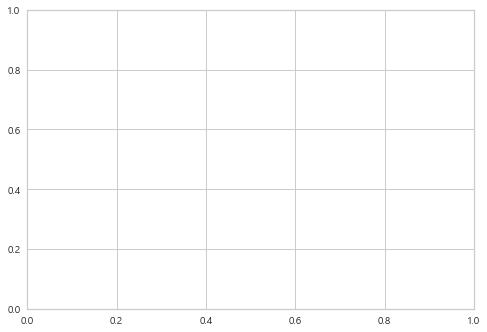

In [16]:
clf.evaluate_model(best_model)

In [19]:
# 모델 저장
clf.save_model(best_model , 'lightgbm_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='purchase_sum_단순증감여부',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.8,
                                 importance_type='split', learning_rate=0.4,
                                 max_dept

In [21]:
# 모델 불러오기
loaded_model = clf.load_model('lightgbm_best_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [22]:
print(loaded_model)

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='purchase_sum_단순증감여부',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.8,
                                importance_type='split', learning_rate=0.4,
                                max_depth=-1, min_child_s

## 피처 추가
1~3분기 R(평균 구매 주기) 등급화

In [26]:
R_total_Q3 = pd.read_csv('생성데이터/RFM/4. R_평균 구매주기 계산/2. 3분기별/2. 등급화 이후/R_total(한번구매보정)_Q1_Q3_등급화.csv', index_col = 0)
R_total_Q3.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,6,2,2,2,7,5,7,7,5,3,4,4,1,7,1,3,7,3
2,7,1,4,3,6,3,7,7,4,2,7,3,1,7,3,2,7,3
3,7,1,7,7,6,7,7,7,7,5,1,3,7,7,6,7,3,7
4,7,2,4,4,6,4,7,7,7,3,4,3,3,4,3,6,6,4
6,4,3,3,7,6,7,7,7,7,3,2,2,2,2,2,3,2,6


In [28]:
new_li = []
for column in R_total_Q3.columns:
    new_column = 'Recency_rank' + column
    new_li.append(new_column)
new_li

['Recency_rank가구인테리어/잡화_고가',
 'Recency_rank가구인테리어/잡화_저가',
 'Recency_rank가구인테리어/잡화_중가',
 'Recency_rank가전/레저취미/멀티샵_고가',
 'Recency_rank가전/레저취미/멀티샵_저가',
 'Recency_rank가전/레저취미/멀티샵_중가',
 'Recency_rank교육문화/아동_고가',
 'Recency_rank교육문화/아동_저가',
 'Recency_rank교육문화/아동_중가',
 'Recency_rank식품/생활_고가',
 'Recency_rank식품/생활_저가',
 'Recency_rank식품/생활_중가',
 'Recency_rank의류/이미용_고가',
 'Recency_rank의류/이미용_저가',
 'Recency_rank의류/이미용_중가',
 'Recency_rank침구/주방_고가',
 'Recency_rank침구/주방_저가',
 'Recency_rank침구/주방_중가']

In [29]:
R_total_Q3.columns = new_li
R_total_Q3.head()

,Recency_rank가구인테리어/잡화_고가,Recency_rank가구인테리어/잡화_저가,Recency_rank가구인테리어/잡화_중가,Recency_rank가전/레저취미/멀티샵_고가,Recency_rank가전/레저취미/멀티샵_저가,Recency_rank가전/레저취미/멀티샵_중가,Recency_rank교육문화/아동_고가,Recency_rank교육문화/아동_저가,Recency_rank교육문화/아동_중가,Recency_rank식품/생활_고가,Recency_rank식품/생활_저가,Recency_rank식품/생활_중가,Recency_rank의류/이미용_고가,Recency_rank의류/이미용_저가,Recency_rank의류/이미용_중가,Recency_rank침구/주방_고가,Recency_rank침구/주방_저가,Recency_rank침구/주방_중가
1,6,2,2,2,7,5,7,7,5,3,4,4,1,7,1,3,7,3
2,7,1,4,3,6,3,7,7,4,2,7,3,1,7,3,2,7,3
3,7,1,7,7,6,7,7,7,7,5,1,3,7,7,6,7,3,7
4,7,2,4,4,6,4,7,7,7,3,4,3,3,4,3,6,6,4
6,4,3,3,7,6,7,7,7,7,3,2,2,2,2,2,3,2,6


In [30]:
plus_R_features_total_Q3 = pd.concat([change_features_q3, R_total_Q3], axis = 1)
plus_R_features_total_Q3.head()

,횟수별_1분기 중요 카테고리 top_1_가구인테리어/잡화_고가,횟수별_1분기 중요 카테고리 top_1_가구인테리어/잡화_저가,횟수별_1분기 중요 카테고리 top_1_가구인테리어/잡화_중가,횟수별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,횟수별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,횟수별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,횟수별_1분기 중요 카테고리 top_1_교육문화/아동_고가,횟수별_1분기 중요 카테고리 top_1_교육문화/아동_중가,횟수별_1분기 중요 카테고리 top_1_식품/생활_고가,횟수별_1분기 중요 카테고리 top_1_식품/생활_저가,횟수별_1분기 중요 카테고리 top_1_식품/생활_중가,횟수별_1분기 중요 카테고리 top_1_의류/이미용_고가,횟수별_1분기 중요 카테고리 top_1_의류/이미용_저가,횟수별_1분기 중요 카테고리 top_1_의류/이미용_중가,횟수별_1분기 중요 카테고리 top_1_침구/주방_고가,횟수별_1분기 중요 카테고리 top_1_침구/주방_저가,횟수별_1분기 중요 카테고리 top_1_침구/주방_중가,금액별_1분기 중요 카테고리 top_1_가구인테리어/잡화_고가,금액별_1분기 중요 카테고리 top_1_가구인테리어/잡화_저가,금액별_1분기 중요 카테고리 top_1_가구인테리어/잡화_중가,금액별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,금액별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,금액별_1분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,금액별_1분기 중요 카테고리 top_1_교육문화/아동_고가,금액별_1분기 중요 카테고리 top_1_교육문화/아동_저가,금액별_1분기 중요 카테고리 top_1_교육문화/아동_중가,금액별_1분기 중요 카테고리 top_1_식품/생활_고가,금액별_1분기 중요 카테고리 top_1_식품/생활_저가,금액별_1분기 중요 카테고리 top_1_식품/생활_중가,금액별_1분기 중요 카테고리 top_1_의류/이미용_고가,금액별_1분기 중요 카테고리 top_1_의류/이미용_저가,금액별_1분기 중요 카테고리 top_1_의류/이미용_중가,금액별_1분기 중요 카테고리 top_1_침구/주방_고가,금액별_1분기 중요 카테고리 top_1_침구/주방_저가,금액별_1분기 중요 카테고리 top_1_침구/주방_중가,횟수별_2분기 중요 카테고리 top_1_가구인테리어/잡화_고가,횟수별_2분기 중요 카테고리 top_1_가구인테리어/잡화_저가,횟수별_2분기 중요 카테고리 top_1_가구인테리어/잡화_중가,횟수별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,횟수별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,횟수별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,횟수별_2분기 중요 카테고리 top_1_교육문화/아동_고가,횟수별_2분기 중요 카테고리 top_1_교육문화/아동_저가,횟수별_2분기 중요 카테고리 top_1_교육문화/아동_중가,횟수별_2분기 중요 카테고리 top_1_식품/생활_고가,횟수별_2분기 중요 카테고리 top_1_식품/생활_저가,횟수별_2분기 중요 카테고리 top_1_식품/생활_중가,횟수별_2분기 중요 카테고리 top_1_의류/이미용_고가,횟수별_2분기 중요 카테고리 top_1_의류/이미용_저가,횟수별_2분기 중요 카테고리 top_1_의류/이미용_중가,횟수별_2분기 중요 카테고리 top_1_침구/주방_고가,횟수별_2분기 중요 카테고리 top_1_침구/주방_저가,횟수별_2분기 중요 카테고리 top_1_침구/주방_중가,금액별_2분기 중요 카테고리 top_1_가구인테리어/잡화_고가,금액별_2분기 중요 카테고리 top_1_가구인테리어/잡화_저가,금액별_2분기 중요 카테고리 top_1_가구인테리어/잡화_중가,금액별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_고가,금액별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_저가,금액별_2분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,금액별_2분기 중요 카테고리 top_1_교육문화/아동_고가,...,금액별_3분기 중요 카테고리 top_1_가전/레저취미/멀티샵_중가,금액별_3분기 중요 카테고리 top_1_교육문화/아동_고가,금액별_3분기 중요 카테고리 top_1_교육문화/아동_저가,금액별_3분기 중요 카테고리 top_1_교육문화/아동_중가,금액별_3분기 중요 카테고리 top_1_식품/생활_고가,금액별_3분기 중요 카테고리 top_1_식품/생활_저가,금액별_3분기 중요 카테고리 top_1_식품/생활_중가,금액별_3분기 중요 카테고리 top_1_의류/이미용_고가,금액별_3분기 중요 카테고리 top_1_의류/이미용_저가,금액별_3분기 중요 카테고리 top_1_의류/이미용_중가,금액별_3분기 중요 카테고리 top_1_침구/주방_고가,금액별_3분기 중요 카테고리 top_1_침구/주방_저가,금액별_3분기 중요 카테고리 top_1_침구/주방_중가,label,사치품_구매횟수 등급,일용품_구매횟수 등급,선매품_구매횟수 등급,사치품_구매액 등급,일용품_구매액 등급,선매품_구매액 등급,전체_구매횟수 등급,전체_구매액 등급,Engel_PURAMT,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가,purchase_sum_단순증감여부,Recency_rank가구인테리어/잡화_고가,Recency_rank가구인테리어/잡화_저가,Recency_rank가구인테리어/잡화_중가,Recency_rank가전/레저취미/멀티샵_고가,Recency_rank가전/레저취미/멀티샵_저가,Recency_rank가전/레저취미/멀티샵_중가,Recency_rank교육문화/아동_고가,Recency_rank교육문화/아동_저가,Recency_rank교육문화/아동_중가,Recency_rank식품/생활_고가,Recency_rank식품/생활_저가,Recency_rank식품/생활_중가,Recency_rank의류/이미용_고가,Recency_rank의류/이미용_저가,Recency_rank의류/이미용_중가,Recency_rank침구/주방_고가,Recency_rank침구/주방_저가,Recency_rank침구/주방_중가
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,8,1,3,2,1,1,7,14.123424,0.526978,-1.634662,1.017175,-1.940643,0.000000e+00,-7.063463e-02,0.0,0.0,-0.536326,-2.651036,3.388950,2.615883,-0.999963,0.000000,3.348119e+00,3.114404e+00,0.000000e+00,0.323959,1,6,2,2,2,7,5,7,7,5,3,4,4,1,7,1,3,7,3
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,7,3,1,1,1,1,7,14.981724,0.000000,-2.234919,-0.573576,0.688889,-5.374311e-01,-7.730096e-17,0

In [31]:
plus_R_features_total_Q3_ = plus_R_features_total_Q3.drop('label', axis = 1, inplace = False)

In [32]:
new_df_ = clf.setup(data=plus_R_features_total_Q3_,
                   target='purchase_sum_단순증감여부',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True)

,Description,Value
0,session_id,8590
1,Target,purchase_sum_단순증감여부
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(18866, 152)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,132
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
model = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6391,0.6800,0.7546,0.6473,0.6968,0.2576,0.2623,0.1920
gbc,Gradient Boosting Classifier,0.6344,0.6786,0.7863,0.6353,0.7027,0.2418,0.2512,1.9560
lr,Logistic Regression,0.6342,0.6787,0.7505,0.6434,0.6928,0.2472,0.2517,3.4900
ridge,Ridge Classifier,0.6340,0.0000,0.7570,0.6416,0.6945,0.2457,0.2510,0.0760
lda,Linear Discriminant Analysis,0.6340,0.6772,0.7558,0.6420,0.6942,0.2461,0.2512,0.3340
ada,Ada Boost Classifier,0.6336,0.6724,0.7741,0.6373,0.6990,0.2419,0.2495,0.5080
rf,Random Forest Classifier,0.6287,0.6664,0.7456,0.6391,0.6882,0.2359,0.2402,0.6840
xgboost,Extreme Gradient Boosting,0.6210,0.6616,0.7107,0.6397,0.6733,0.2250,0.2267,2.5320
et,Extra Trees Classifier,0.6095,0.6389,0.7386,0.6219,0.6753,0.1946,0.1992,0.9580
svm,SVM - Linear Kernel,0.5804,0.0000,0.7304,0.6067,0.6290,0.1316,0.1609,0.5160


In [34]:
best_model = clf.tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6293,0.6692,0.7215,0.6456,0.6815,0.2416,0.2437
1,0.6406,0.6833,0.7390,0.6528,0.6932,0.2634,0.2664
2,0.6345,0.6676,0.7462,0.6448,0.6918,0.2487,0.2527
3,0.6292,0.6680,0.7312,0.6432,0.6843,0.2396,0.2425
4,0.6392,0.6795,0.7426,0.6505,0.6935,0.2596,0.2629
Mean,0.6346,0.6735,0.7361,0.6474,0.6889,0.2506,0.2536
Std,0.0048,0.0066,0.0088,0.0037,0.0050,0.0095,0.0097


In [35]:
clf.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
# 모델 저장
clf.save_model(best_model , 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='purchase_sum_단순증감여부',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1, min_child_samples=61,
                                 min_child_wei

# 전분기 데이터 불러오기

In [37]:
plus_features_total_concat = pd.read_csv('생성데이터/RFM/6. 3분기별로 모든 피처 데이터/Total_Q_Rmf_Engel_concat.csv', index_col = 0)
plus_features_total_concat.head()

,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,전반기_횟수별_중요 카테고리 top_1_식품/생활_고가,전반기_횟수별_중요 카테고리 top_1_식품/생활_저가,전반기_횟수별_중요 카테고리 top_1_식품/생활_중가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,전반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,전반기_횟수별_중요 카테고리 top_1_침구/주방_고가,전반기_횟수별_중요 카테고리 top_1_침구/주방_저가,전반기_횟수별_중요 카테고리 top_1_침구/주방_중가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,전반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,전반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_저가,전반기_금액별_중요 카테고리 top_1_교육문화/아동_중가,전반기_금액별_중요 카테고리 top_1_식품/생활_고가,전반기_금액별_중요 카테고리 top_1_식품/생활_저가,전반기_금액별_중요 카테고리 top_1_식품/생활_중가,전반기_금액별_중요 카테고리 top_1_의류/이미용_고가,전반기_금액별_중요 카테고리 top_1_의류/이미용_저가,전반기_금액별_중요 카테고리 top_1_의류/이미용_중가,전반기_금액별_중요 카테고리 top_1_침구/주방_고가,전반기_금액별_중요 카테고리 top_1_침구/주방_저가,전반기_금액별_중요 카테고리 top_1_침구/주방_중가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_고가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_저가,중반기_횟수별_중요 카테고리 top_1_가구인테리어/잡화_중가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,중반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_고가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_저가,중반기_횟수별_중요 카테고리 top_1_교육문화/아동_중가,중반기_횟수별_중요 카테고리 top_1_식품/생활_고가,중반기_횟수별_중요 카테고리 top_1_식품/생활_저가,중반기_횟수별_중요 카테고리 top_1_식품/생활_중가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_고가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_저가,중반기_횟수별_중요 카테고리 top_1_의류/이미용_중가,중반기_횟수별_중요 카테고리 top_1_침구/주방_고가,중반기_횟수별_중요 카테고리 top_1_침구/주방_저가,중반기_횟수별_중요 카테고리 top_1_침구/주방_중가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_고가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_저가,중반기_금액별_중요 카테고리 top_1_가구인테리어/잡화_중가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_고가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가,중반기_금액별_중요 카테고리 top_1_가전/레저취미/멀티샵_중가,중반기_금액별_중요 카테고리 top_1_교육문화/아동_고가,...,후반기_금액별_중요 카테고리 top_1_식품/생활_저가,후반기_금액별_중요 카테고리 top_1_식품/생활_중가,후반기_금액별_중요 카테고리 top_1_의류/이미용_고가,후반기_금액별_중요 카테고리 top_1_의류/이미용_저가,후반기_금액별_중요 카테고리 top_1_의류/이미용_중가,후반기_금액별_중요 카테고리 top_1_침구/주방_고가,후반기_금액별_중요 카테고리 top_1_침구/주방_저가,후반기_금액별_중요 카테고리 top_1_침구/주방_중가,사치품_구매횟수 등급,일용품_구매횟수 등급,선매품_구매횟수 등급,사치품_구매액 등급,일용품_구매액 등급,선매품_구매액 등급,전체_구매횟수 등급,전체_구매액 등급,Engel_PURAMT,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가,주말,평일,주말 비율,Recency_rank가구인테리어/잡화_고가,Recency_rank가구인테리어/잡화_저가,Recency_rank가구인테리어/잡화_중가,Recency_rank가전/레저취미/멀티샵_고가,Recency_rank가전/레저취미/멀티샵_저가,Recency_rank가전/레저취미/멀티샵_중가,Recency_rank교육문화/아동_고가,Recency_rank교육문화/아동_저가,Recency_rank교육문화/아동_중가,Recency_rank식품/생활_고가,Recency_rank식품/생활_저가,Recency_rank식품/생활_중가,Recency_rank의류/이미용_고가,Recency_rank의류/이미용_저가,Recency_rank의류/이미용_중가,Recency_rank침구/주방_고가,Recency_rank침구/주방_저가,Recency_rank침구/주방_중가,label,purchase_sum_단순증감여부,전반기_횟수별_중요 카테고리 top_1_교육문화/아동_저가,후반기_횟수별_중요 카테고리 top_1_가전/레저취미/멀티샵_저가
1,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.0,0,2,8,1,3,2,1,1,7,14.123424,0.526978,-1.634662,1.017175,-1.940643,0.000000e+00,-7.063463e-02,0.0,0.0,-0.536326,-2.651036,3.388950,2.615883,-0.999963,0.000000,3.348119e+00,3.114404e+00,0.000000,0.323959,66.0,314.0,0.173684,6,2,2,2,7,5,7,7,5,3,4,4,1,7,1,3,7,3,0,1,0.0,0.0
2,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.0,0,1,7,3,1,1,1,1,7,14.981724,0.000000,-2.234919,-0.573576,0.688889,-5.374311e-01,-4.450794e-17,0.0,0.0,-0.027369,-3.203711,0.000000,-20.989003,-2.553079,0.

In [39]:
plus_features_total_concat.shape

(94330, 158)

## 모델링 적용

### Target = label 일때

In [40]:
new_df = clf.setup(data=plus_features_total_concat.drop('purchase_sum_단순증감여부', axis = 1),
                   target='label',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True,)

,Description,Value
0,session_id,8692
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(94330, 157)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,134
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
# 모델 객체 다 돌려보기
model = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6408,0.6943,0.6435,0.6445,0.6440,0.2816,0.2816,0.9980
ridge,Ridge Classifier,0.6361,0.0000,0.6301,0.6423,0.6361,0.2722,0.2723,0.2800
lda,Linear Discriminant Analysis,0.6361,0.6860,0.6299,0.6423,0.6360,0.2722,0.2723,2.7260
lr,Logistic Regression,0.6328,0.6823,0.6286,0.6385,0.6335,0.2657,0.2657,27.7740
xgboost,Extreme Gradient Boosting,0.6297,0.6802,0.6228,0.6361,0.6293,0.2594,0.2595,19.0800
gbc,Gradient Boosting Classifier,0.6235,0.6723,0.6139,0.6305,0.6221,0.2471,0.2472,17.7400
ada,Ada Boost Classifier,0.6161,0.6600,0.6028,0.6239,0.6132,0.2323,0.2325,3.6980
rf,Random Forest Classifier,0.6077,0.6489,0.6082,0.6122,0.6102,0.2154,0.2154,5.4760
et,Extra Trees Classifier,0.5561,0.5794,0.5480,0.5618,0.5548,0.1123,0.1123,9.0700
nb,Naive Bayes,0.5501,0.5703,0.4680,0.5674,0.5105,0.1017,0.1042,0.7740


In [42]:
# 최적의 모델 찾아주기
best_model = clf.tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6455,0.6997,0.6476,0.6492,0.6484,0.2909,0.2909
1,0.6389,0.6951,0.6350,0.6445,0.6397,0.2778,0.2779
2,0.6434,0.6978,0.6439,0.6477,0.6458,0.2868,0.2868
3,0.6365,0.6882,0.6458,0.6383,0.6420,0.2728,0.2728
4,0.6421,0.6942,0.6418,0.6467,0.6442,0.2842,0.2842
Mean,0.6413,0.6950,0.6428,0.6453,0.6440,0.2825,0.2825
Std,0.0032,0.0039,0.0044,0.0038,0.0030,0.0065,0.0064


In [43]:
# 최적의 모델로 학습한 결과 시각화
clf.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Target = purchase_sum 일 때

In [44]:
new_df_ = clf.setup(data=plus_features_total_concat.drop('label', axis = 1),
                   target='purchase_sum_단순증감여부',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True,)

,Description,Value
0,session_id,1254
1,Target,purchase_sum_단순증감여부
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(94330, 157)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,134
8,Ordinal Features,False
9,High Cardinality Features,False


In [45]:
# 모델 객체 다 돌리기
model_ = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6425,0.6966,0.6557,0.6402,0.6478,0.2850,0.2851,1.0240
ridge,Ridge Classifier,0.6384,0.0000,0.6646,0.6327,0.6483,0.2766,0.2770,0.2240
lda,Linear Discriminant Analysis,0.6383,0.6890,0.6644,0.6327,0.6482,0.2766,0.2769,2.9720
lr,Logistic Regression,0.6356,0.6847,0.6583,0.6310,0.6444,0.2712,0.2714,21.3640
xgboost,Extreme Gradient Boosting,0.6314,0.6820,0.6522,0.6275,0.6396,0.2628,0.2630,21.7300
gbc,Gradient Boosting Classifier,0.6250,0.6745,0.6575,0.6187,0.6375,0.2499,0.2504,17.1240
ada,Ada Boost Classifier,0.6185,0.6639,0.6536,0.6120,0.6321,0.2368,0.2374,3.7340
rf,Random Forest Classifier,0.6098,0.6511,0.5970,0.6141,0.6054,0.2197,0.2198,5.5140
svm,SVM - Linear Kernel,0.5725,0.0000,0.6815,0.5977,0.5893,0.1443,0.1785,5.8380
et,Extra Trees Classifier,0.5588,0.5836,0.5561,0.5605,0.5583,0.1176,0.1176,8.8820


In [46]:
# 최적의 모델 찾아주기
best_model_ = clf.tune_model(model_)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6314,0.6863,0.6513,0.6277,0.6393,0.2627,0.2629
1,0.6388,0.6919,0.6512,0.6367,0.6438,0.2775,0.2776
2,0.6398,0.6937,0.6553,0.6369,0.6460,0.2796,0.2797
3,0.6337,0.6888,0.6487,0.6311,0.6398,0.2674,0.2675
4,0.6384,0.6939,0.6385,0.6397,0.6391,0.2767,0.2767
Mean,0.6364,0.6909,0.6490,0.6344,0.6416,0.2728,0.2729
Std,0.0033,0.0030,0.0057,0.0044,0.0028,0.0065,0.0065


In [47]:
# 최적의 모델로 학습한 결과 시각화
clf.evaluate_model(best_model_)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…